In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [102]:
df = pd.read_excel(r'new-dataset.xlsx')

In [103]:
df.describe()

,Year,Month,Day,Hour,Latitude,Longitude
count,53943.000000,53943.000000,53943.000000,53718.000000,53913.000000,53913.000000
mean,2008.968059,6.662162,4.196912,1347.265349,35.582109,-78.619224
std,3.789760,3.514630,1.909440,531.654039,11.289883,24.957587
min,2003.000000,1.000000,1.000000,0.000000,0.000000,-88.959213
25%,2006.000000,4.000000,3.000000,1000.000000,39.142048,-86.551520
50%,2009.000000,7.000000,4.000000,1400.000000,39.164430,-86.530992
75%,2012.000000,10.000000,6.000000,1700.000000,39.173344,-86.508288
max,2015.000000,12.000000,7.000000,2300.000000,41.228665,86.596363


In [104]:
# When do different Collision Types Happen
# what's the most frequent injury type for different months?
# Is there a relation between primary factor and time of the month, or year, or weekend?
# What is the most frequest report)Location?

# CLEANING
# DONE Why are there some lat/long that are not at the right location?
# DONE Injury Type inspection?

# Visual Ideas
# Create a time series for Injury Type
# Create a time series for Primary Factor

# Steps

# DONE Clean Year Month Date into date-time
# DONE Perform Cleaning thoughts
# Answer Questions
# Create Visuals 

In [105]:
# No Week Data Found, and Days are only from 1-7, so Days is unreliable

# Cleaning

## Convert Date Columns to DateTime

In [106]:
df['Day'] = 1
df['year_month'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

## Injury Type Inspection

In [107]:
df.groupby(['Injury Type'])['Reported_Location'].count()

Injury Type
Fatal                   115
Incapacitating         1088
No injury/unknown     41571
Non-incapacitating    11134
Name: Reported_Location, dtype: int64

## Answer Questions

### When do different Collision Types Happen?


In [108]:
df.groupby(['Collision Type'])['Reported_Location'].count()

Collision Type
1-Car               10242
2-Car               37575
3+ Cars              3152
Bus                   850
Cyclist               468
Moped/Motorcycle     1007
Pedestrian            608
Name: Reported_Location, dtype: int64

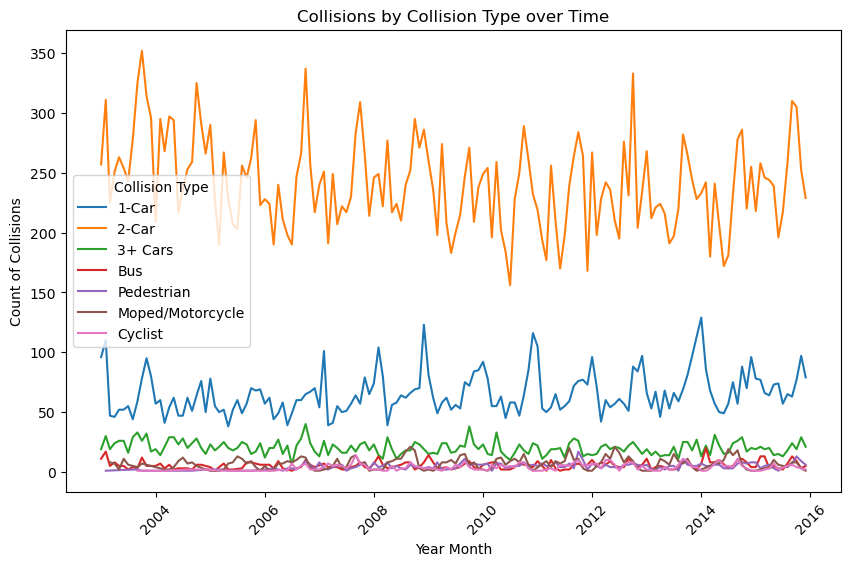

In [109]:
df2 = df.groupby(['year_month','Collision Type'],as_index=False).size()
plt.figure(figsize=(10, 6))
sns.lineplot(x='year_month', y='size', hue='Collision Type', data=df2)
plt.title('Collisions by Collision Type over Time')
plt.xlabel('Year Month')
plt.ylabel('Count of Collisions')
plt.xticks(rotation=45)
plt.show()

### what's the most frequent injury type for different months?


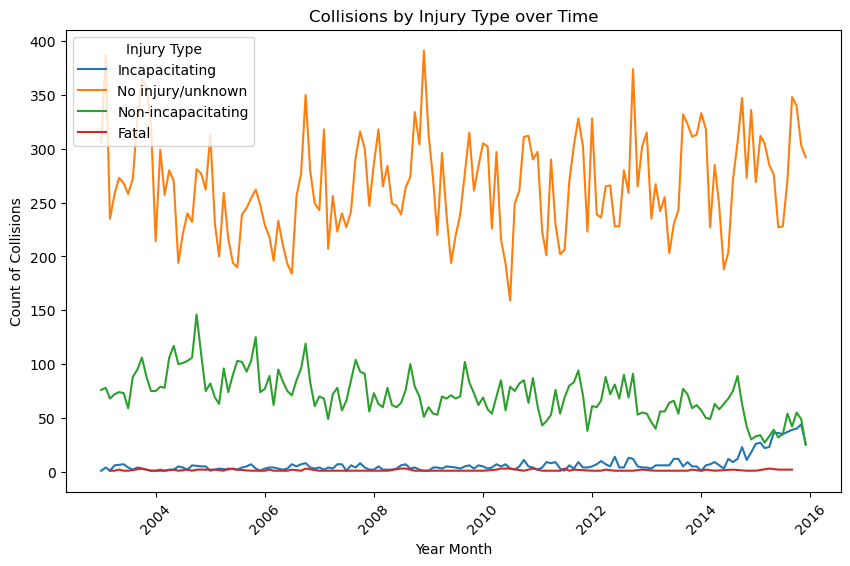

In [110]:
# ~80% are No injury/unkown
df2 = df.groupby(['year_month','Injury Type'],as_index=False).size()
plt.figure(figsize=(10, 6))
sns.lineplot(x='year_month', y='size', hue='Injury Type', data=df2)
plt.title('Collisions by Injury Type over Time')
plt.xlabel('Year Month')
plt.ylabel('Count of Collisions')
plt.xticks(rotation=45)
plt.show()

Some slight increase in 'Incapacitating' collisions in 2014 until 2016.
While, there is a decrease 'Non-Incapacitating' around the same time.
Over the years, there is a negative slope in 'Non-Incapacitating' collisions.

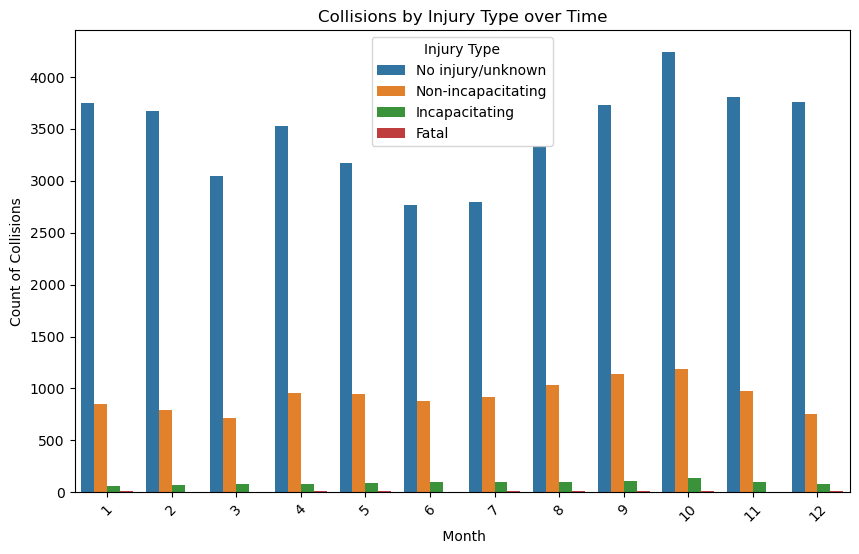

In [112]:
# ~80% are No injury/unkown
#df2 = df.groupby(['Month','Injury Type'],as_index=False).size()
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Injury Type', data=df)
plt.title('Collisions by Injury Type over Time')
plt.xlabel(' Month')
plt.ylabel('Count of Collisions')
plt.xticks(rotation=45)
plt.show()

There is a high amount for October!

### Is there a relation between primary factor and time of the month, or year, or weekend?

In [114]:
df.groupby('Primary Factor').size().sort_values(ascending=False).reset_index(name='Count').head()['Primary Factor'].unique()

array(['FAILURE TO YIELD RIGHT OF WAY', 'FOLLOWING TOO CLOSELY',
       'OTHER (DRIVER) - EXPLAIN IN NARRATIVE', 'UNSAFE BACKING',
       'RAN OFF ROAD RIGHT'], dtype=object)

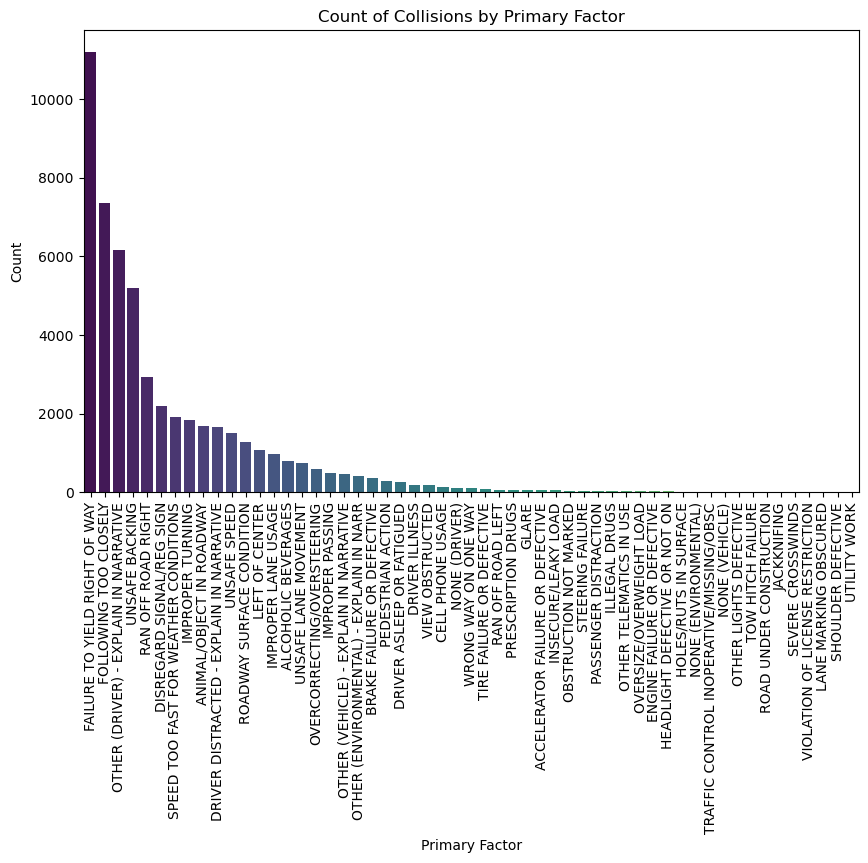

In [115]:
grouped_data = df.groupby('Primary Factor').size().sort_values(ascending=False).reset_index(name='Count')

# Plot using Seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Primary Factor', y='Count', data=grouped_data, palette='viridis')
plt.title('Count of Collisions by Primary Factor')
plt.xlabel('Primary Factor')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

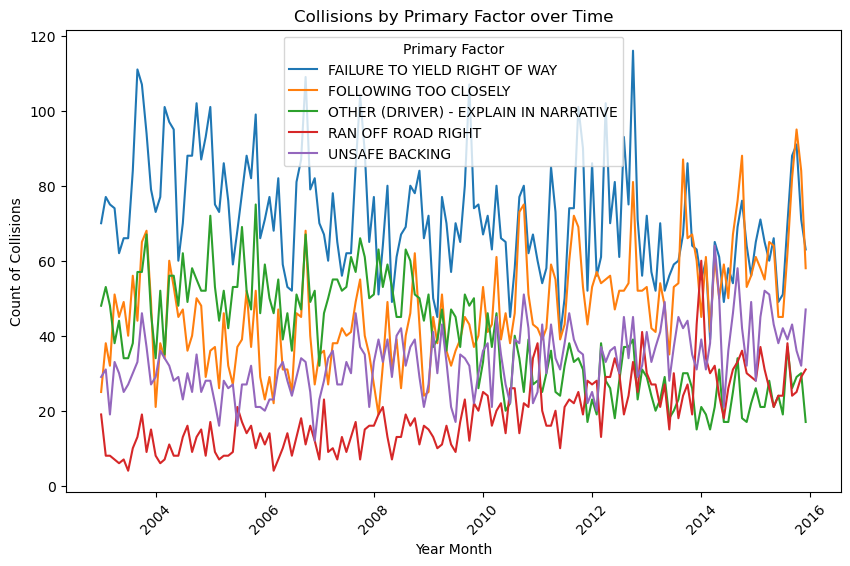

In [116]:
# ~80% are No injury/unkown
df2 = df.groupby(['year_month','Primary Factor'],as_index=False).size()
df2 = df2[df2['Primary Factor'].isin(['FAILURE TO YIELD RIGHT OF WAY', 'FOLLOWING TOO CLOSELY',
       'OTHER (DRIVER) - EXPLAIN IN NARRATIVE', 'UNSAFE BACKING',
       'RAN OFF ROAD RIGHT'])]
plt.figure(figsize=(10, 6))
sns.lineplot(x='year_month', y='size', hue='Primary Factor', data=df2)
plt.title('Collisions by Primary Factor over Time')
plt.xlabel('Year Month')
plt.ylabel('Count of Collisions')
plt.xticks(rotation=45)
plt.show()

In [117]:
# Of the top 5 factors, most interestingly "Following Too Closely" has become a major reason for collisions
# Secondly, Failure to Yield has slowly decreased over the years

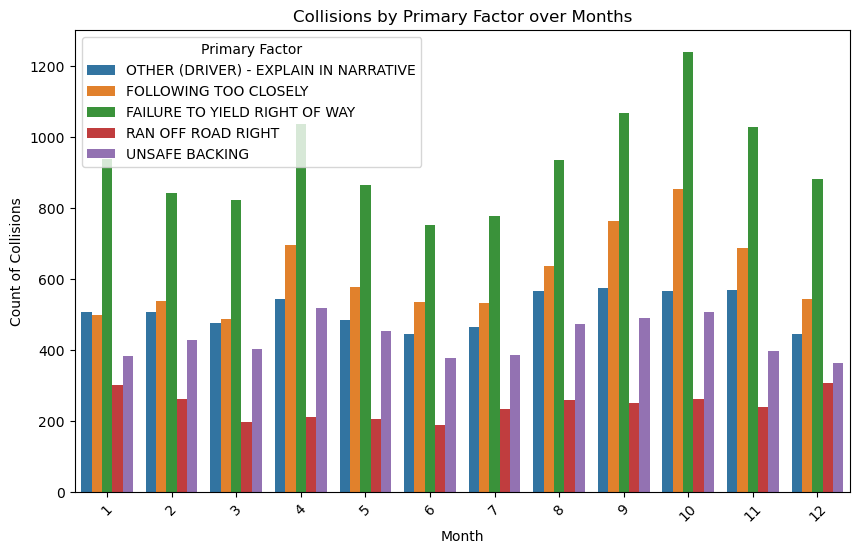

In [118]:
# ~80% are No injury/unkown
#df2 = df.groupby(['year_month','Primary Factor'],as_index=False).size()
df2 = df[df['Primary Factor'].isin(['FAILURE TO YIELD RIGHT OF WAY', 'FOLLOWING TOO CLOSELY',
       'OTHER (DRIVER) - EXPLAIN IN NARRATIVE', 'UNSAFE BACKING',
       'RAN OFF ROAD RIGHT'])]
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Primary Factor', data=df2)
plt.title('Collisions by Primary Factor over Months')
plt.xlabel('Month')
plt.ylabel('Count of Collisions')
plt.xticks(rotation=45)
plt.show()

In [119]:
# Both "Following too closely" and "Failure to Yield" increase in October

### What is the most frequest report Location


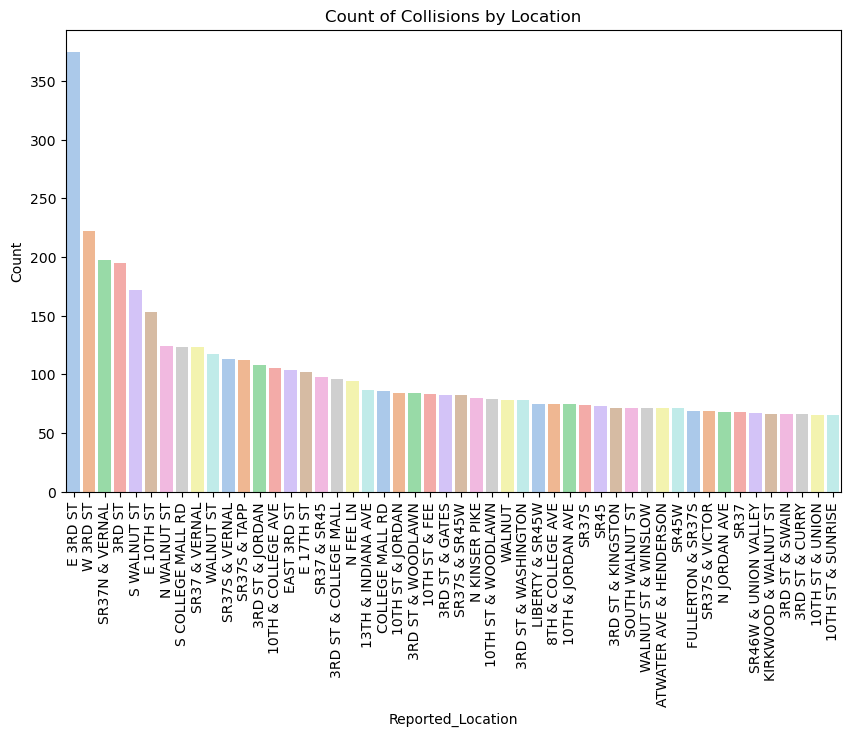

In [121]:
grouped_data = df.groupby('Reported_Location').size().sort_values(ascending=False).reset_index(name='Count').head(50)

# Plot using Seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Reported_Location', y='Count', data=grouped_data, palette='pastel')
plt.title('Count of Collisions by Location')
plt.xlabel('Reported_Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

E 3rd St is the most common reported location

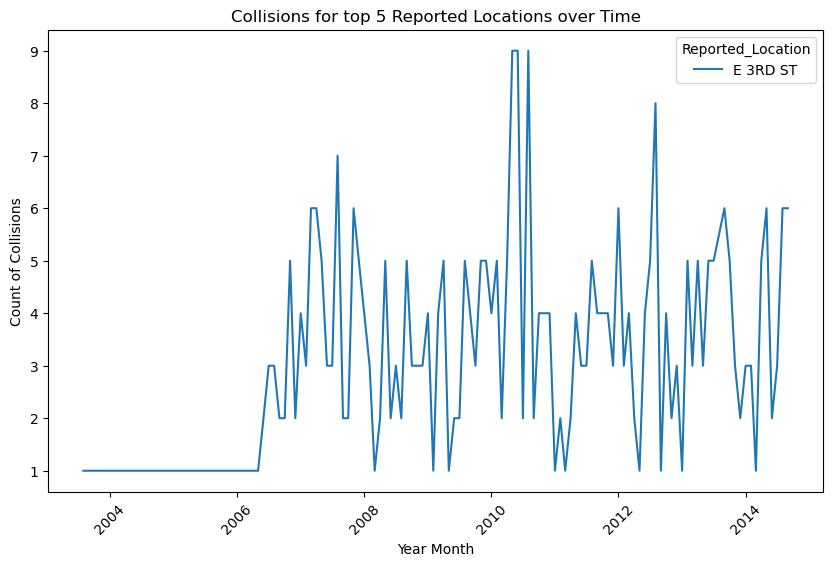

In [127]:
df2 = df.groupby(['year_month','Reported_Location'],as_index=False).size()
df2 = df2[df2['Reported_Location'].isin(['E 3RD ST'])]
plt.figure(figsize=(10, 6))
sns.lineplot(x='year_month', y='size', hue='Reported_Location', data=df2)
plt.title('Collisions for top 5 Reported Locations over Time')
plt.xlabel('Year Month')
plt.ylabel('Count of Collisions')
plt.xticks(rotation=45)
plt.show()

No clear trend over the years, but there is an outlier in 2010 that surged in collisions on E 3rd St

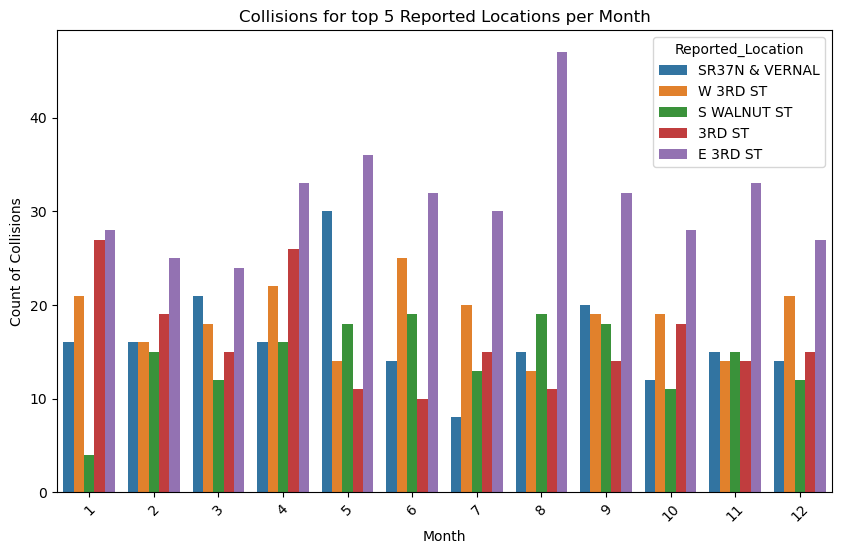

In [125]:
df2 = df[df['Reported_Location'].isin(['E 3RD ST', 'W 3RD ST', 'SR37N & VERNAL', '3RD ST', 'S WALNUT ST'])]
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Reported_Location', data=df2)
plt.title('Collisions for top 5 Reported Locations per Month')
plt.xlabel('Month')
plt.ylabel('Count of Collisions')
plt.xticks(rotation=45)
plt.show()

There is a large occurrence of collisions on E 3rd St during the month August